In [1]:
# Some important packages to import

import pandas as pd
pd.set_option('display.max_columns', None) # you can see all the columns of a dataframe table
 
import numpy as np
import math
import time
from scipy import stats
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot") # ggplot in R

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_2016_v2.csv')

In [3]:
train['transactiondate']= pd.to_datetime(train['transactiondate'], format='%Y-%m-%d')
train['Month'] = train['transactiondate'].map(lambda x: x.month)

In [4]:
train.drop(['transactiondate'], axis=1, inplace=True)

In [5]:
train.head()

,parcelid,logerror,Month
0,11016594,0.0276,1
1,14366692,-0.1684,1
2,12098116,-0.0040,1
3,12643413,0.0218,1
4,14432541,-0.0050,1


In [6]:
properties = pd.read_csv('properties_2016.csv')

In [7]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [8]:
    merged = pd.merge(train,properties,on="parcelid",how="left")

In [9]:
merged.head(10)

,parcelid,logerror,Month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,1,1.0,NaN,NaN,4.0,4.0,NaN,1.0,4.0,NaN,NaN,3067.0,3067.0,NaN,NaN,NaN,NaN,6037.0,NaN,4.0,NaN,NaN,NaN,2.0,33870089.0,-118402768.0,2708.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,HBR3YY,6.037621e+07,29712.0,3101.0,NaN,96109.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1982.0,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,1,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,NaN,NaN,1297.0,1297.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,7.0,33899475.0,-118212720.0,6677.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,CORH*,6.037542e+07,24174.0,3101.0,NaN,96091.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1939.0,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,1,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,853.0,1763.0,1763.0,NaN,NaN,853.0,NaN,6111.0,1.0,2.0,2.0,0.0,NaN,NaN,34207204.0,-119165589.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111003e+07,13150.0,2061.0,NaN,97101.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,1994.0,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,1,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,796.0,796.0,NaN,NaN,NaN,NaN,6059.0,NaN,1.0,1.0,0.0,NaN,NaN,33549600.0,-117678000.0,NaN,NaN,NaN,NaN,NaN,NaN,34,266.0,NaN,6.059042e+07,25459.0,1286.0,NaN,96987.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1984.0,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.084

In [10]:
merged.shape

(90275, 60)

In [11]:
merged.dtypes

parcelid                          int64
logerror                        float64
Month                             int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


In [12]:
merged = merged[merged['logerror'] <  merged['logerror'].quantile(0.9975)]  # exclude 0.5% of outliers
merged = merged[merged['logerror'] >  merged['logerror'].quantile(0.0025)]
merged.shape

(89822, 60)

In [13]:
merged.head(20)

,parcelid,logerror,Month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,1,1.0,NaN,NaN,4.0,4.0,NaN,1.0,4.0,NaN,NaN,3067.0,3067.0,NaN,NaN,NaN,NaN,6037.0,NaN,4.0,NaN,NaN,NaN,2.0,33870089.0,-118402768.0,2708.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,HBR3YY,6.037621e+07,29712.0,3101.0,NaN,96109.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1982.0,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,1,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,NaN,NaN,1297.0,1297.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,7.0,33899475.0,-118212720.0,6677.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,CORH*,6.037542e+07,24174.0,3101.0,NaN,96091.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1939.0,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,1,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,853.0,1763.0,1763.0,NaN,NaN,853.0,NaN,6111.0,1.0,2.0,2.0,0.0,NaN,NaN,34207204.0,-119165589.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111003e+07,13150.0,2061.0,NaN,97101.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,1994.0,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,1,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,796.0,796.0,NaN,NaN,NaN,NaN,6059.0,NaN,1.0,1.0,0.0,NaN,NaN,33549600.0,-117678000.0,NaN,NaN,NaN,NaN,NaN,NaN,34,266.0,NaN,6.059042e+07,25459.0,1286.0,NaN,96987.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1984.0,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.084

In [14]:
merged.dtypes

parcelid                          int64
logerror                        float64
Month                             int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


In [15]:
# check missing value in row dimension
row_missing = merged.isnull().sum(axis=1)/merged.shape[1]
print (row_missing[row_missing>0.8])

Series([], dtype: float64)


In [16]:
# create a dataframe to store number of missing value in column dimension
missing = pd.DataFrame(merged.isnull().sum(axis=0), columns=['missing_num'])
missing.reset_index(level=0, inplace=True)

missing

,index,missing_num
0,parcelid,0
1,logerror,0
2,Month,0
3,airconditioningtypeid,61138
4,architecturalstyletypeid,89562
5,basementsqft,89779
6,bathroomcnt,0
7,bedroomcnt,0
8,buildingclasstypeid,89809
9,buildingqualitytypeid,32777


In [17]:
num_85 = 0.85 * merged.shape[0]
missing_85_plus = missing[
    missing['missing_num'] >= num_85].sort_values(
    by=['missing_num'], ascending=False)


In [18]:
missing_85_plus

,index,missing_num
8,buildingclasstypeid,89809
15,finishedsquarefeet13,89789
5,basementsqft,89779
43,storytypeid,89779
48,yardbuildingsqft26,89727
51,fireplaceflag,89601
4,architecturalstyletypeid,89562
45,typeconstructiontypeid,89524
18,finishedsquarefeet6,89405
11,decktypeid,89167


In [19]:
missing_value_features = []

for f in missing_85_plus['index']:
    
        missing_value_features.append(f)

merged.drop(missing_value_features, axis=1, inplace=True)

In [20]:
merged.shape

(89822, 38)

In [21]:
merged.head()

,parcelid,logerror,Month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,2.0,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,1.0,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.1684,1,NaN,3.5,4.0,NaN,3.5,2263.0,2263.0,6059.0,3.0,2.0,468.0,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,12098116,-0.0040,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,3.0,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,1.0,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,1,1.0,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,2.0,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,1.0,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.0050,1,NaN,2.5,4.0,NaN,2.5,2283.0,2283.0,6059.0,2.0,2.0,598.0,NaN,33485643.0,-117700234.0,6000.0,1.0,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


In [22]:
# create a dataframe to store number of missing value in column dimension
missing = pd.DataFrame(merged.isnull().sum(axis=0), columns=['missing_num'])
missing.reset_index(level=0, inplace=True)

missing

,index,missing_num
0,parcelid,0
1,logerror,0
2,Month,0
3,airconditioningtypeid,61138
4,bathroomcnt,0
5,bedroomcnt,0
6,buildingqualitytypeid,32777
7,calculatedbathnbr,1154
8,calculatedfinishedsquarefeet,646
9,finishedsquarefeet12,4612


In [23]:
merged['finishedsquarefeet12'].fillna((merged['finishedsquarefeet12'].mean()), inplace=True)
merged['lotsizesquarefeet'].fillna((merged['lotsizesquarefeet'].mean()), inplace=True)
merged['calculatedfinishedsquarefeet'].fillna((merged['calculatedfinishedsquarefeet'].mean()), inplace=True)
merged['taxamount'].fillna((merged['taxamount'].mean()), inplace=True)

In [24]:
# replace by median
for f in ['airconditioningtypeid', 'buildingqualitytypeid', 'heatingorsystemtypeid', 'yearbuilt','numberofstories','yearbuilt','unitcnt','regionidcity','regionidneighborhood']:
    merged[f].fillna(
        np.nanmedian(merged[f]), 
        inplace=True)

In [25]:
#Deal with the data type
merged['regionidzip']= merged['regionidzip'].astype('str')
merged['airconditioningtypeid']= merged['airconditioningtypeid'].astype('str')
merged['heatingorsystemtypeid']= merged['heatingorsystemtypeid'].astype('str')
merged['propertylandusetypeid']= merged['propertylandusetypeid'].astype('str')
merged['regionidcity']= merged['regionidcity'].astype('str')
merged['regionidcounty']= merged['regionidcounty'].astype('str')
merged['regionidneighborhood']= merged['regionidneighborhood'].astype('str')
merged['regionidneighborhood']= merged['regionidneighborhood'].astype('str')
merged['yearbuilt']= merged['yearbuilt'].astype('str')
merged['numberofstories']= merged['numberofstories'].astype('str')
merged['assessmentyear']= merged['assessmentyear'].astype('str')
merged['censustractandblock']= merged['censustractandblock'].astype('str')
merged['rawcensustractandblock']= merged['rawcensustractandblock'].astype('str')
merged['parcelid']= merged['parcelid'].astype('str')
merged['buildingqualitytypeid']= merged['buildingqualitytypeid'].astype('str')

In [26]:
merged

,parcelid,logerror,Month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.000000,6037.0,2.0,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,0100,261.0,LARS,60371066.461001,12447.0,3101.0,31817.0,96370.0,0.0,1.0,1959.0,1.0,122754.0,360170.0,2015.0,237416.0,6735.88,60371066461001.0
1,14366692,-0.1684,1,1.0,3.5,4.0,7.0,3.5,2263.0,2263.000000,6059.0,3.0,2.0,468.0,2.0,33668120.0,-117677556.0,3643.0,NaN,NaN,1,261.0,NaN,60590524.222024,32380.0,1286.0,118887.0,96962.0,0.0,1.0,2014.0,1.0,346458.0,585529.0,2015.0,239071.0,10153.02,nan
2,12098116,-0.0040,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.000000,6037.0,3.0,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,0100,261.0,PSR6,60374638.00300401,47019.0,3101.0,275411.0,96293.0,0.0,1.0,1940.0,1.0,61994.0,119906.0,2015.0,57912.0,11484.48,60374638003004.0
3,12643413,0.0218,1,1.0,2.0,2.0,4.0,2.0,839.0,839.000000,6037.0,2.0,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,010C,266.0,LAR3,60372963.002002,12447.0,3101.0,54300.0,96222.0,0.0,1.0,1987.0,1.0,171518.0,244880.0,2015.0,73362.0,3048.74,60372963002002.0
4,14432541,-0.0050,1,1.0,2.5,4.0,7.0,2.5,2283.0,2283.000000,6059.0,2.0,2.0,598.0,2.0,33485643.0,-117700234.0,6000.0,1.0,1.0,122,261.0,NaN,60590423.381006,17686.0,1286.0,118887.0,96961.0,8.0,1.0,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,60590423381006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,12,1.0,1.0,1.0,4.0,1.0,653.0,653.000000,6037.0,1.0,NaN,NaN,2.0,34203000.0,-118562000.0,93676.0,1.0,1.0,010C,266.0,LARD1.5,60371317.01100501,12447.0,3101.0,40548.0,96364.0,0.0,1.0,1979.0,1.0,43800.0,191000.0,2015.0,147200.0,2495.24,60371317011005.0
90271,12046695,0.0070,12,1.0,3.0,3.0,4.0,3.0,2856.0,2856.000000,6037.0,3.0,NaN,NaN,2.0,34198744.0,-118224849.0,9343.0,NaN,NaN,0100,261.0,GLR1RY,60373008.00201701,45457.0,3101.0,274580.0,96327.0,0.0,1.0,1965.0,1.0,117893.0,161111.0,2015.0,43218.0,1886.54,60373008002017.0
90272,12995401,-0.2679,12,1.0,2.0,4.0,7.0,2.0,2617.0,1745.422709,6037.0,2.0,NaN,NaN,2.0,34075655.0,-118025537.0,6865.0,NaN,NaN,0200,246.0,EMR3YY,60374327.001008,51861.0,3101.0,118887.0,96478.0,0.0,2.0,1924.0,1.0,22008.0,38096.0,2015.0,16088.0,1925.70,60374327001008.0
90273,11402105,0.0602,12,1.0,2.0,2.0,4.0,2.0,1034.0,1034.000000,6037.0,2.0,NaN,NaN,2.0,33963900.0,-118367000.0,20033.0,NaN,NaN,010C,266.0,INR4*,60376014.013,45888.0,3101.0,118887.0,96133.0,0.0,1.0,1981.0,1.0,132991.0,165869.0,2015.0,32878.0,2285.57,60376014013000.0


In [27]:
merged.dtypes

parcelid                         object
logerror                        float64
Month                             int64
airconditioningtypeid            object
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid            object
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid            object
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
pooltypeid7                     float64
propertycountylandusecode        object
propertylandusetypeid            object
propertyzoningdesc               object
rawcensustractandblock           object
regionidcity                     object


In [28]:
# drop one value features
one_value_features = []

for f in merged:
    if len(merged[f].value_counts()) == 1:
        one_value_features.append(f)


In [29]:
one_value_features

['poolcnt', 'pooltypeid7', 'assessmentyear']

In [30]:
# deal with zip code, to see where our house at
merged['regionidzip']= merged['regionidzip'].astype('str')
merged['regionidzip'] = merged['regionidzip'].apply(lambda x: x[0]+x[1]+x[-1])

In [31]:
merged['regionidzip']

0        960
1        960
2        960
3        960
4        960
        ... 
90270    960
90271    960
90272    960
90273    960
90274    960
Name: regionidzip, Length: 89822, dtype: object

Text(0, 0.5, 'Frequency')

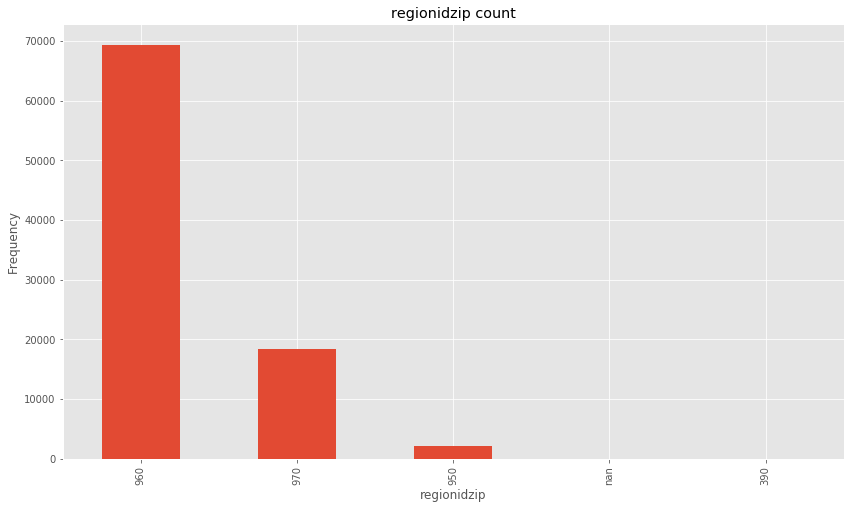

In [32]:
ax = merged['regionidzip'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="regionidzip count")
ax.set_xlabel("regionidzip")
ax.set_ylabel("Frequency")

In [33]:
# from the corelation is very high, so we can drop some variables
#0.984
merged.drop(['fullbathcnt'], axis=1, inplace=True)

In [34]:
#0.999
merged.drop(['censustractandblock'], axis=1, inplace=True)

In [35]:
#0.955
merged.drop(['structuretaxvaluedollarcnt'], axis=1, inplace=True)

In [36]:
#0.955
merged.drop(['landtaxvaluedollarcnt'], axis=1, inplace=True)

In [37]:
#0.949
merged.drop(['taxvaluedollarcnt'], axis=1, inplace=True)

In [38]:
#1
merged.drop(['finishedsquarefeet12'], axis=1, inplace=True)

In [39]:
#0.999937
merged.drop(['rawcensustractandblock'], axis=1, inplace=True)


In [40]:
#1
merged.drop(['calculatedbathnbr'], axis=1, inplace=True)

In [41]:
#Only one value
merged.drop(['assessmentyear'], axis=1, inplace=True)

In [42]:
merged.select_dtypes(include = [np.number]).corr()

,logerror,Month,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,roomcnt,unitcnt,taxamount
logerror,1.000000,0.015033,0.030447,0.026105,0.038459,0.010110,0.013624,0.019137,-0.001800,0.005977,0.004876,NaN,NaN,0.010827,-0.006286,-0.022095
Month,0.015033,1.000000,0.003869,0.011105,-0.004749,-0.001288,-0.005456,-0.000271,0.006984,-0.008205,0.002736,NaN,NaN,-0.000688,-0.004165,-0.014252
bathroomcnt,0.030447,0.003869,1.000000,0.645674,0.758062,0.009517,0.501650,0.450609,0.022746,-0.018379,-0.000426,NaN,NaN,0.044153,0.096474,0.463823
bedroomcnt,0.026105,0.011105,0.645674,1.000000,0.616502,0.023456,0.431551,0.591215,0.066560,-0.005038,-0.107158,NaN,NaN,0.164370,0.147609,0.240619
calculatedfinishedsquarefeet,0.038459,-0.004749,0.758062,0.616502,1.000000,0.058175,0.505027,0.603811,0.009403,-0.022069,-0.047268,NaN,NaN,0.098241,0.111000,0.584766
fips,0.010110,-0.001288,0.009517,0.023456,0.058175,1.000000,0.060052,0.034605,-0.076083,-0.324023,-0.073973,NaN,NaN,0.699125,-0.046254,-0.030466
garagecarcnt,0.013624,-0.005456,0.501650,0.431551,0.505027,0.060052,1.000000,0.641257,0.054147,-0.035332,0.045432,NaN,NaN,0.172607,-0.207170,0.352698
garagetotalsqft,0.019137,-0.000271,0.450609,0.591215,0.603811,0.034605,0.641257,1.000000,0.061566,-0.030189,-0.241982,NaN,NaN,0.407617,-0.096499,0.348099
latitude,-0.001800,0.006984,0.022746,0.066560,0.009403,-0.076083,0.054147,0.061566,1.000000,-0.594412,0.084033,NaN,NaN,-0.206488,-0.003988,-0.078615
longitude,0.005977,-0.008205,-0.018379,-0.005038,-0.022069,-0.324023,-0.035332,-0.030189,-0.594412,1.000000,-0.059465,NaN,NaN,-0.051138,-0.009882,-0.034677


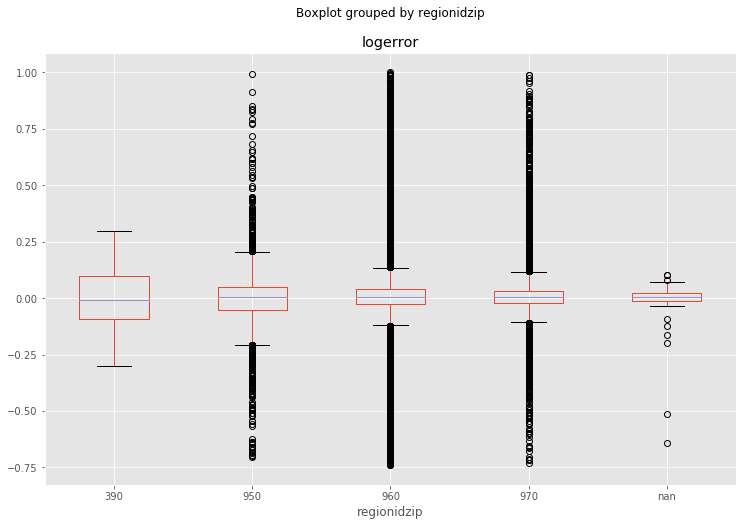

In [43]:
# boxplot of interest rate grouped by zip code
merged.boxplot(column='logerror', by='regionidzip', figsize=(12,8))
plt.show()

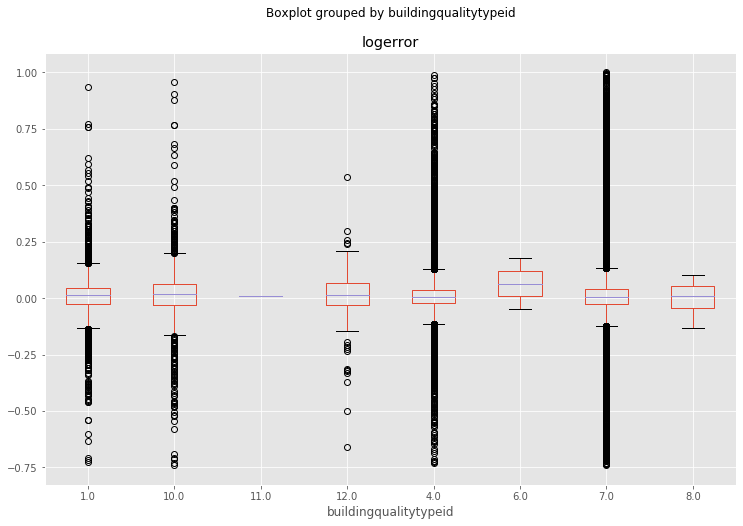

In [44]:
merged.boxplot(column='logerror', by='buildingqualitytypeid', figsize=(12,8))
plt.show()

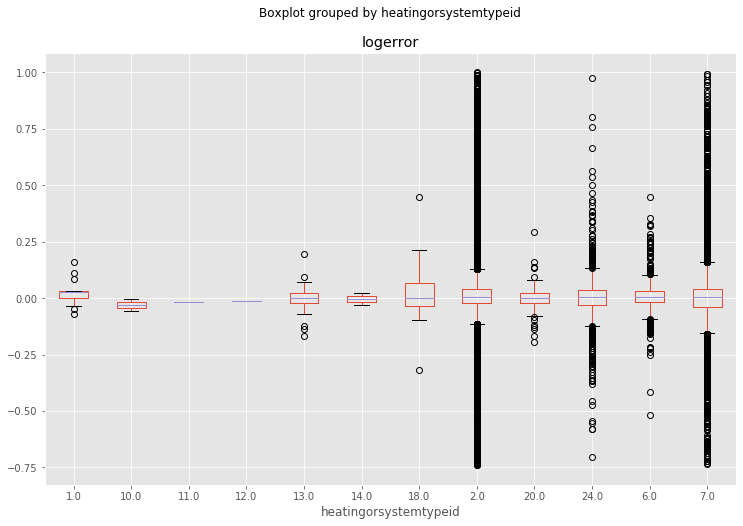

In [45]:
merged.boxplot(column='logerror', by='heatingorsystemtypeid', figsize=(12,8))
plt.show()

In [46]:
merged.drop(['regionidzip'], axis=1, inplace=True)

In [47]:
merged.shape

(89822, 28)

In [48]:
merged = merged.fillna(0)

In [49]:
# create a dataframe to store number of missing value in column dimension
missing = pd.DataFrame(merged.isnull().sum(axis=0), columns=['missing_num'])
missing.reset_index(level=0, inplace=True)

missing

,index,missing_num
0,parcelid,0
1,logerror,0
2,Month,0
3,airconditioningtypeid,0
4,bathroomcnt,0
5,bedroomcnt,0
6,buildingqualitytypeid,0
7,calculatedfinishedsquarefeet,0
8,fips,0
9,garagecarcnt,0


In [50]:
merged.head(40)

,parcelid,logerror,Month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,regionidcity,regionidcounty,regionidneighborhood,roomcnt,unitcnt,yearbuilt,numberofstories,taxamount
0,11016594,0.0276,1,1.0,2.0,3.0,4.0,1684.0,6037.0,0.0,0.0,2.0,34280990.0,-118488536.0,7528.000000,0.0,0.0,0100,261.0,LARS,12447.0,3101.0,31817.0,0.0,1.0,1959.0,1.0,6735.88
1,14366692,-0.1684,1,1.0,3.5,4.0,7.0,2263.0,6059.0,2.0,468.0,2.0,33668120.0,-117677556.0,3643.000000,0.0,0.0,1,261.0,0,32380.0,1286.0,118887.0,0.0,1.0,2014.0,1.0,10153.02
2,12098116,-0.0040,1,1.0,3.0,2.0,4.0,2217.0,6037.0,0.0,0.0,2.0,34136312.0,-118175032.0,11423.000000,0.0,0.0,0100,261.0,PSR6,47019.0,3101.0,275411.0,0.0,1.0,1940.0,1.0,11484.48
3,12643413,0.0218,1,1.0,2.0,2.0,4.0,839.0,6037.0,0.0,0.0,2.0,33755800.0,-118309000.0,70859.000000,0.0,0.0,010C,266.0,LAR3,12447.0,3101.0,54300.0,0.0,1.0,1987.0,1.0,3048.74
4,14432541,-0.0050,1,1.0,2.5,4.0,7.0,2283.0,6059.0,2.0,598.0,2.0,33485643.0,-117700234.0,6000.000000,1.0,1.0,122,261.0,0,17686.0,1286.0,118887.0,8.0,1.0,1981.0,2.0,5488.96
5,11509835,-0.2705,1,1.0,4.0,4.0,1.0,3067.0,6037.0,0.0,0.0,2.0,33870089.0,-118402768.0,2708.000000,0.0,0.0,0100,261.0,HBR3YY,29712.0,3101.0,118887.0,0.0,1.0,1982.0,1.0,27126.57
6,12286022,0.0440,1,1.0,1.0,2.0,7.0,1297.0,6037.0,0.0,0.0,7.0,33899475.0,-118212720.0,6677.000000,0.0,0.0,0100,261.0,CORH*,24174.0,3101.0,118887.0,0.0,1.0,1939.0,1.0,2304.97
7,17177301,0.1638,1,1.0,2.5,3.0,7.0,1763.0,6111.0,2.0,0.0,2.0,34207204.0,-119165589.0,29118.967089,0.0,0.0,1129,266.0,0,13150.0,2061.0,118887.0,6.0,1.0,1994.0,2.0,3745.50
8,14739064,-0.0030,1,1.0,1.0,2.0,7.0,796.0,6059.0,1.0,0.0,2.0,33549600.0,-117678000.0,29118.967089,0.0,0.0,34,266.0,0,25459.0,1286.0,118887.0,0.0,1.0,1984.0,1.0,2172.88
9,14677559,0.0843,1,1.0,2.0,2.0,7.0,1260.0,6059.0,1.0,0.0,2.0,33612700.0,-117742000.0,29118.967089,0.0,0.0,34,266.0,0,46098.0,1286.0,118887.0,5.0,1.0,1977.0,1.0,1940.26


In [51]:
# before dummy
print (merged.shape)


# get dummies
df1 = pd.get_dummies(merged['airconditioningtypeid'])
df2 = pd.get_dummies(merged['buildingqualitytypeid'])
df3 = pd.get_dummies(merged['heatingorsystemtypeid'])
df4 = pd.get_dummies(merged['propertylandusetypeid'])

df6 = pd.get_dummies(merged['propertycountylandusecode'])
df7 = pd.get_dummies(merged['propertylandusetypeid'])


df11 = pd.get_dummies(merged['yearbuilt'])
df12 = pd.get_dummies(merged['numberofstories'])
df13 = pd.get_dummies(merged['regionidcounty'])
df14 = pd.get_dummies(merged['regionidcity'])
df15 = pd.get_dummies(merged['regionidneighborhood'])



# after dummy
df_concat = pd.concat([merged, df1, df2,df3,df4,df6,df7,df11,df12,df13,df14,df15], axis=1)

(89822, 28)


In [52]:
df_concat 

,parcelid,logerror,Month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,regionidcity,regionidcounty,regionidneighborhood,roomcnt,unitcnt,yearbuilt,numberofstories,taxamount,1.0,11.0,13.0,3.0,5.0,9.0,1.0,10.0,11.0,12.0,4.0,6.0,7.0,8.0,1.0,10.0,11.0,12.0,13.0,14.0,18.0,2.0,20.0,24.0,6.0,7.0,246.0,247.0,248.0,260.0,261.0,263.0,264.0,265.0,266.0,267.0,269.0,275.0,31.0,0,0,010,0100,0101,0102,0103,0104,0108,0109,010C,010D,010E,010F,010G,010H,010M,010V,0110,0111,0114,012C,012D,012E,0130,0131,01DC,01HC,0200,0201,020G,020M,0210,0300,0301,0303,030G,0400,0401,040V,0700,070D,1,100V,1011,1012,1014,105,1110,1111,1112,1116,1117,1128,1129,1210,122,1222,1310,1321,1333,135,1410,1420,1421,1432,1720,200,34,38,6050,73,8800,96,246.0,247.0,248.0,260.0,261.0,263.0,264.0,265.0,266.0,267.0,269.0,275.0,31.0,1885.0,1886.0,1887.0,1888.0,1890.0,1891.0,1892.0,1893.0,1894.0,1895.0,1896.0,1897.0,1898.0,1899.0,1900.0,1901.0,1902.0,1903.0,1904.0,1905.0,1906.0,1907.0,1908.0,1909.0,1910.0,1911.0,1912.0,1913.0,1914.0,1915.0,1916.0,1917.0,1918.0,1919.0,1920.0,1921.0,1922.0,1923.0,1924.0,1925.0,1926.0,1927.0,1928.0,1929.0,1930.0,1931.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,1938.0,1939.0,1940.0,1941.0,1942.0,1943.0,1944.0,1945.0,1946.0,1947.0,1948.0,1949.0,1950.0,1951.0,1952.0,1953.0,1954.0,1955.0,1956.0,1957.0,1958.0,1959.0,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,1.0,2.0,3.0,4.0,1286.0,2061.0,3101.0,10241.0,10389.0,10608.0,10723.0,10734.0,10774.0,10815.0,113412.0,113576.0,114828.0,114834.0,116042.0,11626.0,118217.0,118225.0,118694.0,118875.0,118878.0,118880.0,118895.0,118914.0,118994.0,12292.0,12447.0,12520.0,12773.0,13091.0,13150.0,13232.0,13311.0,13693.0,13716.0,14111.0,14542.0,14634.0,14906.0,15237.0,15554.0,16389.0,16677.0,16764.0,16961.0,17150.0,17597.0,17686.0,17882.0,18098.0,18874.0,18875.0,19177.0,20008.0,21395.0,21412.0,21778.0,22827.0,24174.0,24245.0,24384.0,24435.0,24797.0,24812.0,24832.0,25218.0,25271.0,25458.0,25459.0,25468.0,25621.0,25953.0,25974.0,26483.0,26531.0,26964.0,26965.0,27103.0,27110.0,27183.0,272578.0,27491.0,29189.0,29712.0,30187.0,30267.0,30399.0,30908.0,31134.0,32380.0,32616.0,32753.0,32923.0,32927.0,33252.0,33311.0,33312.0,33612.0,33727.0,33836.0,33837.0,33840.0,34037.0,34278.0,34543.0,34636.0,34780.0,3491.0,36502.0,37015.0,37086.0,37688.0,37882.0,38032.0,38980.0,39076.0,39306.0,39308.0,396053.0,396054.0,396550.0,396551.0,396556.0,40009.0,40081.0,40110.0,40227.0,41673.0,42091.0,42150.0,42967.0,4406.0,44116.0,44833.0,45398.0,45457.0,45602.0,45888.0,46080.0,46098.0,46178.0,46298.0,46314.0,47019.0,47198.0,47547.0,47568.0,47695.0,47762.0,48424.0,50677.0,50749.0,51239.0,51617.0,51861.0,52650.0,52835.0,52842.0,53027.0,53162.0,53571.0,53636.0,53655.0,54053.0,54212.0,54299.0,54311.0,54352.0,5465.0,54722.0,54970.0,5534.0,55753.0,56780.0,6021.0,6285.0,6395.0,6822.0,8384.0,9840.0,113455.0,113688.0,113713.0,113749.0,113886.0,113910.0,114246.0,114808.0,114909.0,114914.0,115609.0,115656.0,115657.0,115729.0,115836.0,116206.0,116302.0,116375.0,116415.0,116430.0,116646.0,116692.0,116774.0,116828.0,117023.0,117148.0,117183.0,117954.0,118106.0,118208.0,118825.0,118849.0,118872.0,118887.0,118920.0,11950.0,13017.0,13176.0,13327.0,135143.0,155228.0,156012.0,191484.0,19265.0,19810.0,21056.0,214079.0,220669.0,224568.0,22655.0,246825.0,248165.0,25449.0,259315.0,259606.0,259818.0,260382.0,260611.0,26134.0,262098.0,265889.0,266606.0,267436.0,267814.0,268002.0,268007.0,268010.0,268050.0,2680

In [53]:
df_concat.shape

(89822, 962)

In [54]:
df_concat.drop(['parcelid'], axis=1, inplace=True)


In [55]:
df_concat.drop(['airconditioningtypeid'], axis=1, inplace=True)
df_concat.drop(['buildingqualitytypeid'], axis=1, inplace=True)
df_concat.drop(['heatingorsystemtypeid'], axis=1, inplace=True)
df_concat.drop(['propertycountylandusecode'], axis=1, inplace=True)
df_concat.drop(['propertyzoningdesc'], axis=1, inplace=True)
df_concat.drop(['propertylandusetypeid'], axis=1, inplace=True)
df_concat.drop(['yearbuilt'], axis=1, inplace=True)
df_concat.drop(['numberofstories'], axis=1, inplace=True)
df_concat.drop(['regionidcounty'], axis=1, inplace=True)
df_concat.drop(['regionidcity'], axis=1, inplace=True)
df_concat.drop(['regionidneighborhood'], axis=1, inplace=True)



In [56]:

y = df_concat['logerror'].values
x = df_concat[df_concat.columns.difference(['logerror'])]





# Split data into train and test (80% & 20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)

In [57]:
from sklearn.preprocessing import StandardScaler

# initialize a scaler object
scaler = StandardScaler()

# transform training set
x_train_std = scaler.fit_transform(x_train)

# the same transform for test set
x_test_std = scaler.transform(x_test)

In [58]:
# transform whole dataset 
X = scaler.fit_transform(x)

In [59]:
x_train

,0,0,010,0100,0101,0102,0103,0104,0108,0109,010C,010D,010E,010F,010G,010H,010M,010V,0110,0111,0114,012C,012D,012E,0130,0131,01DC,01HC,0200,0201,020G,020M,0210,0300,0301,0303,030G,0400,0401,040V,0700,070D,1,1.0,1.0,1.0,1.0,10.0,10.0,100V,1011,1012,1014,10241.0,10389.0,105,10608.0,10723.0,10734.0,10774.0,10815.0,11.0,11.0,11.0,1110,1111,1112,1116,1117,1128,1129,113412.0,113455.0,113576.0,113688.0,113713.0,113749.0,113886.0,113910.0,114246.0,114808.0,114828.0,114834.0,114909.0,114914.0,115609.0,115656.0,115657.0,115729.0,115836.0,116042.0,116206.0,11626.0,116302.0,116375.0,116415.0,116430.0,116646.0,116692.0,116774.0,116828.0,117023.0,117148.0,117183.0,117954.0,118106.0,118208.0,118217.0,118225.0,118694.0,118825.0,118849.0,118872.0,118875.0,118878.0,118880.0,118887.0,118895.0,118914.0,118920.0,118994.0,11950.0,12.0,12.0,1210,122,1222,12292.0,12447.0,12520.0,12773.0,1286.0,13.0,13.0,13017.0,13091.0,1310,13150.0,13176.0,1321,13232.0,13311.0,13327.0,1333,135,135143.0,13693.0,13716.0,14.0,1410,14111.0,1420,1421,1432,14542.0,14634.0,14906.0,15237.0,155228.0,15554.0,156012.0,16389.0,16677.0,16764.0,16961.0,17150.0,1720,17597.0,17686.0,17882.0,18.0,18098.0,1885.0,1886.0,1887.0,18874.0,18875.0,1888.0,1890.0,1891.0,1892.0,1893.0,1894.0,1895.0,1896.0,1897.0,1898.0,1899.0,1900.0,1901.0,1902.0,1903.0,1904.0,1905.0,1906.0,1907.0,1908.0,1909.0,1910.0,1911.0,1912.0,1913.0,1914.0,191484.0,1915.0,1916.0,1917.0,19177.0,1918.0,1919.0,1920.0,1921.0,1922.0,1923.0,1924.0,1925.0,1926.0,19265.0,1927.0,1928.0,1929.0,1930.0,1931.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,1938.0,1939.0,1940.0,1941.0,1942.0,1943.0,1944.0,1945.0,1946.0,1947.0,1948.0,1949.0,1950.0,1951.0,1952.0,1953.0,1954.0,1955.0,1956.0,1957.0,1958.0,1959.0,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,19810.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2.0,2.0,20.0,200,2000.0,20008.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2061.0,21056.0,21395.0,214079.0,21412.0,21778.0,220669.0,224568.0,22655.0,22827.0,24.0,24174.0,24245.0,24384.0,24435.0,246.0,246.0,246825.0,247.0,247.0,24797.0,248.0,248.0,24812.0,248165.0,24832.0,25218.0,25271.0,25449.0,25458.0,25459.0,25468.0,25621.0,259315.0,25953.0,259606.0,25974.0,259818.0,260.0,260.0,260382.0,260611.0,261.0,261.0,26134.0,262098.0,263.0,263.0,264.0,264.0,26483.0,265.0,265.0,26531.0,265889.0,266.0,266.0,266606.0,267.0,267.0,267436.0,267814.0,268002.0,268007.0,268010.0,268050.0,268055.0,268057.0,268097.0,268103.0,268118.0,268132.0,268134.0,268144.0,268157.0,268160.0,268162.0,268208.0,268236.0,268244.0,268249.0,268253.0,268268.0,268269.0,268288.0,268291.0,268293.0,268316.0,268323.0,268334.0,268392.0,268403.0,268404.0,268413.0,268430.0,268441.0,268446.0,268451.0,268453.0,268454.0,268473.0,268482.0,268496.0,268509.0,268540.0,268546.0,268548.0,268551.0,268572.0,268581.0,268585.0,268587.0,268588.0,268596.0,268602.0,268604.0,268605.0,269.0,269.0,26964.0,26965.0,27080.0,27103.0,27110.0,27183.0,272170.0,272578.0,272725.0,272732.0,272737.0,272912.0,272933.0,272968.0,272969.0,273041.0,273042.0,273059.0,273096.0,273109.0,273168.0,273197.0,273198.0,273252.0,273257.0,273263.0,27328.0,273313.0,273339.0,273350.0,273400.0,273486.0,273539.0,273567.0,273572.0,273607.0,273611.0,273615.0,273617.0,273633.0,273663.0,273677.0,273789.0,273791.0,273825.0,273834.0,273837.0,273866.0,273868.0,273890.0,273930.0,274049.0,274262.0,274293.0,27431.0,274343.0,274358.0,274359.0,274371.0,274392.0,274418.0,274425.0,274494.0,274513.0,274514.0,274517.0,274580.0,274582.0,274587.0,274684.0,274695.0,274705.0,274750.0,274765.0,274800.0,274815.0,274828.0,27484.0,274857.0,274895.0,27491.0,274940.0,274961.0,274995.0,275.0,275.0,275024.0,275067.0,275078.0,275111.0,275129.0,275130.0,275207.0,275210.0,275257.0,275287.0,275300.0,275339.0,275340.0,27

In [60]:
## Initialize the random forest regressor model
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [61]:
# Function to evaluate the model using AIC with sum of squared error
def model_evaluation(model, x, y, cv):
    
    kf = KFold(n_splits = cv)
    AIC = 0
    rmse = 0
    mae = 0
    for train_index, validate_index in kf.split(x):
        
        # split to training and validation set
        x_train, x_validate = x[train_index], x[validate_index]
        y_train, y_validate = y[train_index], y[validate_index]
        
        # fit current model
        model.fit(x_train, y_train)
        # predict on validation set
        y_pred = model.predict(x_validate)
        # calculate sse
        sse = np.sum((y_pred - y_validate)**2)
        # number of observations
        n = len(x_train)
        # number of existing features
        k = len([x for x in model.coef_ if x != 0])
        
        # aic
        AIC += 2 * k - 2 * np.log(sse)
        # rmse
        rmse += np.sqrt(np.mean((y_pred - y_validate)**2))
        # mae 
        mae += np.mean(abs(y_pred - y_validate))
        
    # return average score among all validation sets
    return AIC / cv, rmse / cv, mae / cv

In [62]:
# some necessary packages
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [63]:
# Function to evaluate the model using AIC with sum of squared error
def model_evaluation(model, x, y, cv):
    
    kf = KFold(n_splits = cv)
    AIC = 0
    rmse = 0
    mae = 0
    for train_index, validate_index in kf.split(x):
        
        # split to training and validation set
        x_train, x_validate = x[train_index], x[validate_index]
        y_train, y_validate = y[train_index], y[validate_index]
        
        # fit current model
        model.fit(x_train, y_train)
        # predict on validation set
        y_pred = model.predict(x_validate)
        # calculate sse
        sse = np.sum((y_pred - y_validate)**2)
        # number of observations
        n = len(x_train)
        # number of existing features
        k = len([x for x in model.coef_ if x != 0])
        
        # aic
        AIC += 2 * k - 2 * np.log(sse)
        # rmse
        rmse += np.sqrt(np.mean((y_pred - y_validate)**2))
        # mae 
        mae += np.mean(abs(y_pred - y_validate))
        
    # return average score among all validation sets
    return AIC / cv, rmse / cv, mae / cv

In [64]:
LinearReg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
RidgeReg = Ridge(alpha = 0.1)
LassoReg = Lasso(alpha = 0.001)
ElasticnetReg = ElasticNet(alpha = 0.001, l1_ratio = 0.5)

res_dict = {}
for model in [LinearReg, RidgeReg, LassoReg, ElasticnetReg]:
    print ("Training...", model)
    start = time.time()
    aic, rmse, mae = model_evaluation(model, x_train_std, y_train, 10)
    end = time.time()
    diff = end-start
    print ("Running time is %.2f seconds"%diff)
    print ("================================================================")
    res_dict[model] = [round(aic,4), round(rmse,4), round(mae,4), diff]

Training... LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Running time is 109.65 seconds
Training... Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Running time is 35.99 seconds
Training... Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Running time is 42.96 seconds
Training... ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Running time is 126.29 seconds


In [65]:
df = pd.DataFrame(res_dict).T
df.columns = ["aic", "rmse", "mae", "time"]
df

,aic,rmse,mae,time
"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",1765.4711,3.146660e+12,8.853795e+10,109.650881
"Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,\n normalize=False, random_state=None, solver='auto', tol=0.001)",1861.0692,1.100000e-01,6.210000e-02,35.985716
"Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,\n normalize=False, positive=False, precompute=False, random_state=None,\n selection='cyclic', tol=0.0001, warm_start=False)",184.6907,1.094000e-01,6.100000e-02,42.960325
"ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,\n max_iter=1000, normalize=False, positive=False, precompute=False,\n random_state=None, selection='cyclic', tol=0.0001, warm_start=False)",567.6921,1.094000e-01,6.110000e-02,126.285005


In [135]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# initialize model
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3)
# fit model
gb.fit(x_train_std, y_train)
# Predict
y_test_pred_boosting = gb.predict(x_test_std)
rmse_test_boosting = np.sqrt(np.mean((y_test - y_test_pred_boosting)**2))
print ("RMSE on test set for Gradient Boosting: ", rmse_test_boosting)

RMSE on test set for Gradient Boosting:  0.10783756059435022


In [133]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


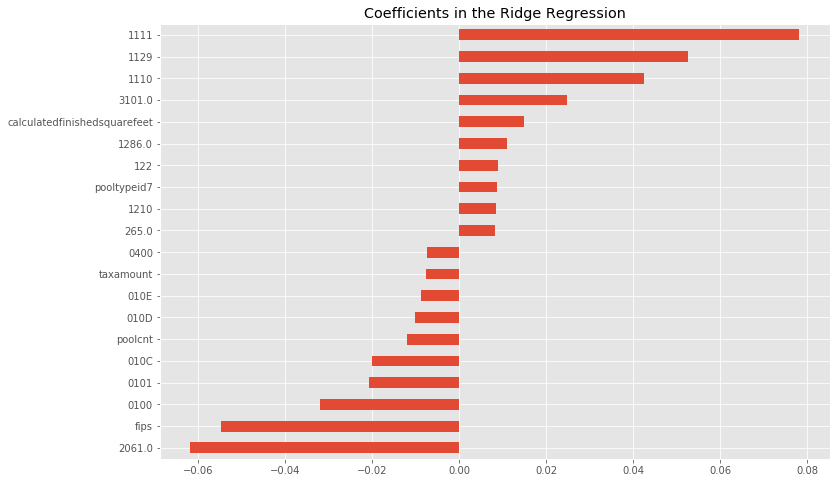

In [67]:
coef = pd.Series(RidgeReg.coef_, index = x.columns)
importance_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.figure(figsize=(12,8))
importance_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Regression")
plt.show()

In [62]:
## Initialize the random forest regressor model
from sklearn.ensemble import RandomForestRegressor

In [63]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train_std, y_train)
y_pred = regressor.predict(x_test_std)

In [64]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06588051692952346
Mean Squared Error: 0.012441873866808334
Root Mean Squared Error: 0.11154314800474449


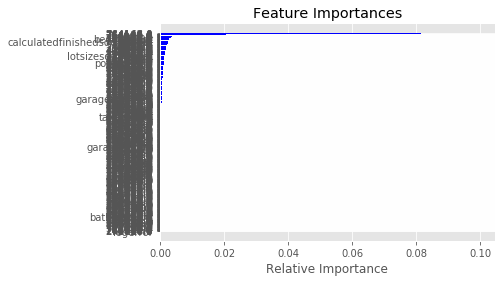

In [66]:
features= df_concat.columns
importances = regressor.feature_importances_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [88]:
feature_list = list(x_train.columns)

In [89]:
importances = list(regressor.feature_importances_)

In [94]:
feature_importances = [(feature, round(importance, 3)) 
                       for feature, importance in zip(feature_list, importances)]


In [95]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [96]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: taxamount            Importance: 0.1
Variable: calculatedfinishedsquarefeet Importance: 0.082
Variable: latitude             Importance: 0.081
Variable: lotsizesquarefeet    Importance: 0.074
Variable: longitude            Importance: 0.072
Variable: Month                Importance: 0.048
Variable: bedroomcnt           Importance: 0.021
Variable: bathroomcnt          Importance: 0.015
Variable: garagetotalsqft      Importance: 0.011
Variable: roomcnt              Importance: 0.006
Variable: 1948.0               Importance: 0.004
Variable: 1949.0               Importance: 0.004
Variable: 1950.0               Importance: 0.004
Variable: 1952.0               Importance: 0.004
Variable: 1954.0               Importance: 0.004
Variable: 1955.0               Importance: 0.004
Variable: 25218.0              Importance: 0.004
Variable: 7.0                  Importance: 0.004
Variable: 0100                 Importance: 0.003
Variable: 0101                 Importance: 0.003
Variable: 1188

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [99]:
regressor2 = RandomForestRegressor(n_estimators=50, random_state=0)
regressor2.fit(x_train_std, y_train)
y_pred = regressor2.predict(x_test_std)

In [101]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06409028873082942
Mean Squared Error: 0.012125822025016966
Root Mean Squared Error: 0.11011731028778793


In [107]:
feature_list = list(x_train.columns)

In [108]:
importances = list(regressor2.feature_importances_)

In [109]:
feature_importances = [(feature, round(importance, 3)) 
                       for feature, importance in zip(feature_list, importances)]


In [110]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [111]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: taxamount            Importance: 0.098
Variable: calculatedfinishedsquarefeet Importance: 0.082
Variable: latitude             Importance: 0.08
Variable: lotsizesquarefeet    Importance: 0.074
Variable: longitude            Importance: 0.072
Variable: Month                Importance: 0.047
Variable: bedroomcnt           Importance: 0.021
Variable: bathroomcnt          Importance: 0.014
Variable: garagetotalsqft      Importance: 0.011
Variable: roomcnt              Importance: 0.006
Variable: 1948.0               Importance: 0.004
Variable: 1949.0               Importance: 0.004
Variable: 1950.0               Importance: 0.004
Variable: 1952.0               Importance: 0.004
Variable: 1953.0               Importance: 0.004
Variable: 1954.0               Importance: 0.004
Variable: 1955.0               Importance: 0.004
Variable: 7.0                  Importance: 0.004
Variable: 0100                 Importance: 0.003
Variable: 118887.0             Importance: 0.003
Variable: 124

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,